In [6]:
from glob import glob
from os.path import join


video_root = "/data/agent_h/datasets_chunyu/clip_videos_v3/"
video_paths = sorted(glob(join(video_root,"**/*.mp4"),recursive=True))
whisper_root = "/data/agent_h/datasets_chunyu/whisper_result_v3/"
whisper_paths = sorted(glob(join(whisper_root,"*")))
mediapipe_root = "/data/agent_h/datasets_chunyu/vsr_landmark_result_v3/"
mediapipe_root = sorted(glob(join(mediapipe_root,"*")))

# 1. form whiper and face into frames

print(video_path[0])
print(whisper_paths[0])
print(mediapipe_root[0])


/data/agent_h/datasets_chunyu/clip_videos_v3/2016-07-10/2016-07-10_0.mp4
/data/agent_h/datasets_chunyu/whisper_result_v3/2016-07-10_0_whisper.json
/data/agent_h/datasets_chunyu/vsr_landmark_result_v3/2016-07-10_0.FaceLandmarkerResultListzip


In [18]:
# clean whisper
from pprint import pprint
import json
import itertools

json_path = whisper_paths[0]
with open(json_path, 'r') as fp:
    whisper_result = json.load(fp)

def get_whisper_text_windows(whisper_result, clip_len=15, window_len=3):
    # get words list
    all_words = [x['words'] for x in whisper_result['segments']]
    flattened_words = list(itertools.chain.from_iterable(all_words))
    # pprint(flattened_words)
    print(len(flattened_words))


get_whisper_text_windows(whisper_result, clip_len=15, window_len=3)


164


1139 frames
478 landmarks per frame
NormalizedLandmark(x=0.18704485893249512, y=0.41934093832969666, z=-0.00774889113381505, visibility=0.0, presence=0.0)


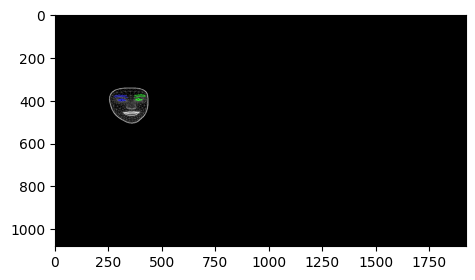

In [43]:
# clean mediapipe result
import gzip
import pickle
import numpy as np
import mediapipe as mp
import cv2
from mediapipe_util import *
import cv2

def draw_landmarks_on_video(mediapipe_result, output_path, height=1080, width=1920):
        # Get the dimensions of the first frame

        # Create a VideoWriter object to save the video
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, 25, (width, height))

        # Iterate through each frame in the mediapipe_result
        for mediapipe_frame in mediapipe_result:
            # Draw the face landmarks on the frame
            canvas = np.zeros((height,width,3),dtype=np.uint8)
            canvas = draw_landmarks_on_image(canvas, mediapipe_frame)

            # Write the frame to the video file
            out.write(canvas)

        # Release the VideoWriter object
        out.release()

def get_mediapipe_windows(mediapipe_path, clip_len=15, window_len=3,fps=25):
    with gzip.open(mediapipe_path, 'r') as fp:
        # load pickle
        mediapipe_result = pickle.load(fp)
    print(len(mediapipe_result), "frames") 
    print(len(mediapipe_result[0].face_landmarks[0]), "landmarks per frame")
    print(mediapipe_result[0].face_landmarks[0][0])
    # example: draw mediapipe face landmarks on black canvas for every frame
    demo = True
    if demo:
        canvas = np.zeros((1080,1920,3),dtype=np.uint8)
        canvas = draw_landmarks_on_image(canvas, mediapipe_result[0])
        show_img_np(canvas)
        
    
    # draw_landmarks_on_video(mediapipe_result, output_path)
    # Call the function to draw landmarks on the video and save it
    draw_landmarks_on_video(mediapipe_result, 'output.mp4')
    

    # make face face front

    # visualize


    

    

    
    

get_mediapipe_windows(mediapipe_root[0], clip_len=15, window_len=3)



In [ ]:
# media

def get_clip_windows(): # debug
    pass

def get_mouth_windows_fron_clip: # use later
    pass